<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Logistic_regression/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


In [75]:
# Importando librerías

import pandas as pd
import seaborn as sns 


In [76]:
pddf = pd.read_csv('Train_Dataset.csv')
pddf.head()

<ipython-input-76-e4c23cee5900>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pddf = pd.read_csv('Train_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [77]:
pddf.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [78]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Car_Owned',
                        'Bike_Owned',
                        'Active_Loan',
                        'House_Own',
                        'Mobile_Tag',
                        'Homephone_Tag']

numerical_features = list(set(pddf.columns.tolist()) - set(categorical_features + ['ID_Days', 'ID', 'Default']))


In [79]:
# convert Series
for col in numerical_features:
  pddf[col] = pd.to_numeric(pddf[col])


### Análisis inicial

<Axes: xlabel='Default', ylabel='count'>

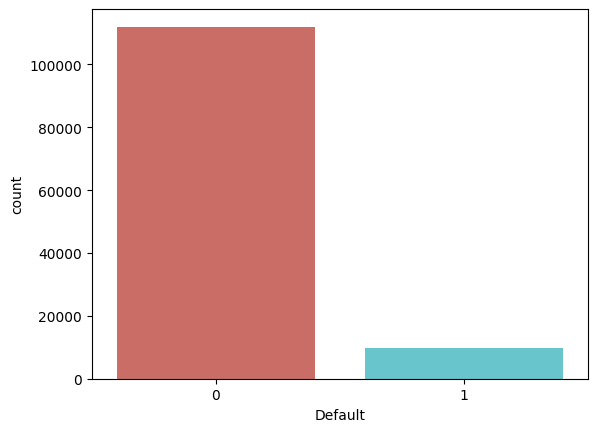

In [80]:
# Analizando el target 
sns.countplot(x='Default', data = pddf, palette = 'hls')

In [81]:
pddf.Default.mean()

0.0807920824579832

In [82]:
#Exploración de variables categóricas
pddf.groupby('House_Own').agg({'Default': 'mean'})

,Default
House_Own,
0.0,0.081051
1.0,0.080454


In [83]:
#Exploración de variables numéricas
#sns.regplot(data = pddf, x = 'Client_Income', y = 'Default', fit_reg = False)

### Muestreo 

In [84]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, 
                               stratify = pddf['Default'],
                               train_size = 0.7, 
                               random_state = 123)


### Análisis univariado I

In [85]:
univariate = train[numerical_features].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)
univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)

In [86]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)


In [ ]:
#Tratemiento de outliers

p95


In [ ]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(X_train[[x + '_imp' for x in f_numeric_features]])


<Axes: >

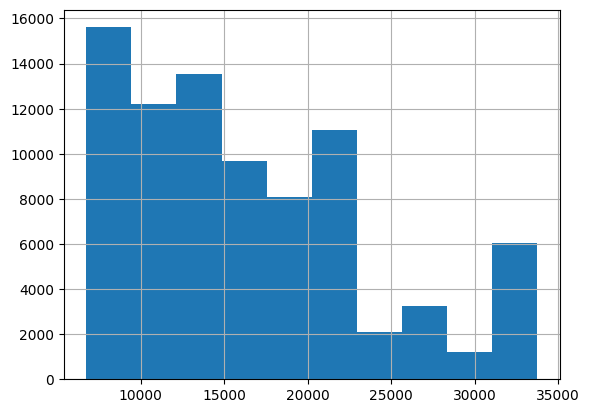

In [88]:
train.Client_Income_t.hist()